# EDA on taxi_trip_pricing

In [3]:
import pandas as pd
from taxipred.utils.constants import TAXI_CSV_RAW

data = pd.read_csv(TAXI_CSV_RAW)
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [5]:
data.shape

(1000, 11)

In [6]:
data_notna = pd.read_csv(TAXI_CSV_RAW).dropna()
data_notna.shape

(562, 11)

In [7]:
data.isna().mean().sort_values(ascending=False)

Trip_Distance_km         0.050
Time_of_Day              0.050
Day_of_Week              0.050
Passenger_Count          0.050
Traffic_Conditions       0.050
Weather                  0.050
Base_Fare                0.050
Per_Km_Rate              0.050
Per_Minute_Rate          0.050
Trip_Duration_Minutes    0.050
Trip_Price               0.049
dtype: float64

### Nearly 5% of every column is NaN
Since its evenly distributed, i consider just dropping them all.

In [8]:
data.head(10)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
8,30.45,Morning,Weekday,3.0,High,Clear,2.77,1.78,0.34,110.33,NaN
9,35.70,Afternoon,Weekday,2.0,Low,Rain,3.39,1.52,0.47,NaN,75.5657


In [9]:
numeric_data = data.select_dtypes(include="number")
corr = numeric_data.corr()

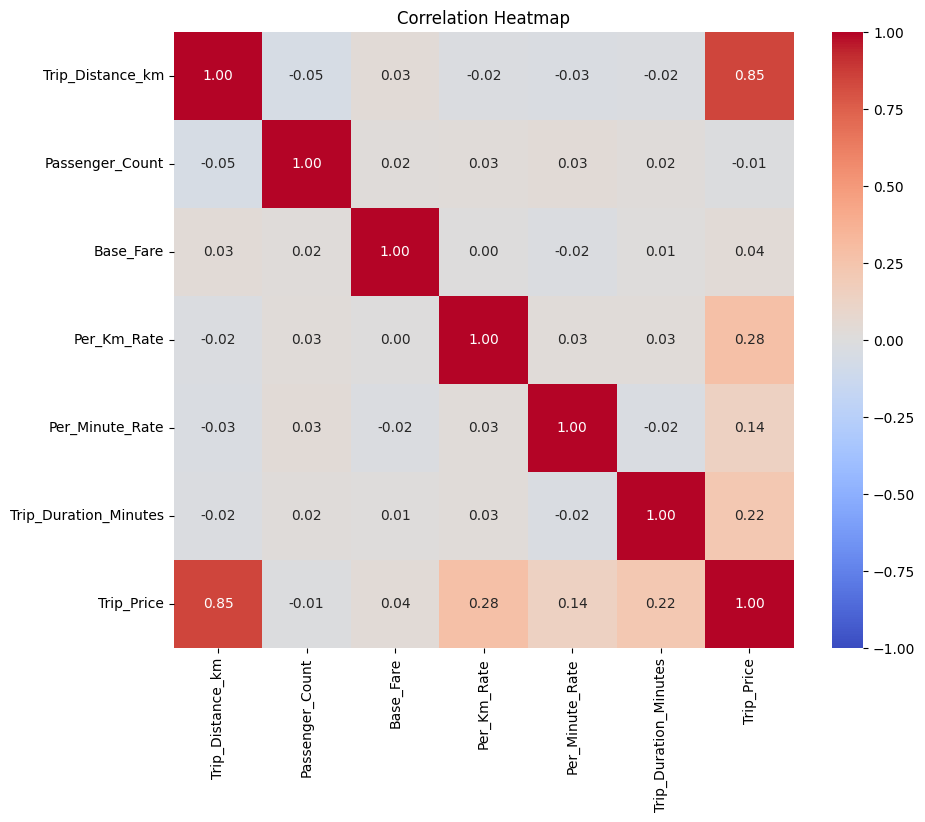

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
corr["Trip_Price"].sort_values(ascending=False)

Trip_Price               1.000000
Trip_Distance_km         0.849123
Per_Km_Rate              0.275135
Trip_Duration_Minutes    0.221211
Per_Minute_Rate          0.141226
Base_Fare                0.035533
Passenger_Count         -0.014223
Name: Trip_Price, dtype: float64

### From this, it's clear that distance is the dominant feature for predicting price.

Since the categorical data isn't suitable for heatmaps, I will use groupby to analyze their correlation with the price.

In [13]:
data.groupby("Traffic_Conditions")["Trip_Price"].mean().sort_values(ascending=False)

Traffic_Conditions
High      65.059510
Low       55.597238
Medium    54.547422
Name: Trip_Price, dtype: float64

In [14]:
data.groupby("Time_of_Day")["Trip_Price"].mean().sort_values(ascending=False)

Time_of_Day
Afternoon    57.958716
Evening      56.404504
Night        56.304401
Morning      55.949429
Name: Trip_Price, dtype: float64

In [15]:
data.groupby("Weather")["Trip_Price"].median().sort_values(ascending=False)

Weather
Rain     52.68775
Snow     50.07450
Clear    48.61490
Name: Trip_Price, dtype: float64

In [16]:
data.groupby("Day_of_Week")["Trip_Price"].mean().sort_values(ascending=False)

Day_of_Week
Weekday    58.012418
Weekend    55.001961
Name: Trip_Price, dtype: float64

<Axes: xlabel='Traffic_Conditions', ylabel='Trip_Price'>

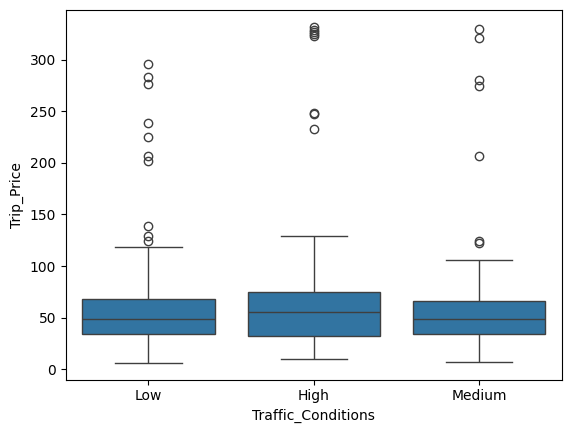

In [17]:
sns.boxplot(x="Traffic_Conditions", y="Trip_Price", data=data)

<Axes: xlabel='Weather', ylabel='Trip_Price'>

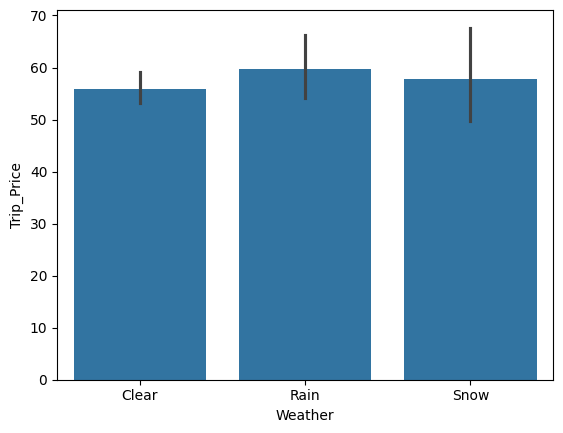

In [18]:
sns.barplot(x="Weather", y="Trip_Price", data=data)

## Conclusion:
All the categorical data and some of the numeric data have small or none correlation to the price. <LineBreak lines=1/>

I could build a base model just using the strong numeric data, and then make a more advanced model using all features - and then compare the two.